In [1]:
# import all libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

## Read Datasets

In [2]:
rating = pd.read_csv('airbnb_ratings_new.csv',engine = 'python')
reviews = pd.read_csv('airbnb-reviews.csv', delimiter=';', skiprows=0, low_memory=False)

In [3]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,488835,104522929,2016-09-27,66003975,Carole,First time using Airbnb and couldn't be happie...
1,549036,37751194,2015-07-10,33501858,Gabi,Muy bien ubicado. Las fotos y la descrpción co...
2,13546118,112010466,2016-11-03,27252960,Alexis,L'appartement est très sympa.\r\nLa chambre qu...
3,549036,45480519,2015-09-03,38589960,Ewelina,I had really good time in Alex apartment and I...
4,13546118,137928884,2017-03-18,111268477,Donovan,Place is pretty nice and Sergio was a big help...
...,...,...,...,...,...,...
8348168,3102110,135630339,2017-03-05,112572493,Jordan,Super cute place! James and Yuna let us check ...
8348169,3102110,136124314,2017-03-08,92004669,Diane,Great place. Great hosts.
8348170,3102110,137148950,2017-03-13,48886823,Jessica,Everything they said was true! It's a nice pla...
8348171,3102110,144335011,2017-04-15,66082823,Isabel,James and Yuna's place was awesome. They where...


## Rating

In [4]:
rating.describe()

,Listing ID,Host ID,Host total listings count,longitude,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365,Number of reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
count,5.204380e+05,5.204380e+05,519942.000000,520438.000000,520438.000000,518973.000000,519931.000000,513150.000000,520438.000000,5.204380e+05,520438.000000,520438.000000,407866.000000,408092.000000,407446.000000,407970.000000,407479.000000,407388.000000,413510.000000
mean,1.042095e+07,3.457765e+07,9.746008,-16.490978,3.331475,1.251377,1.402180,137.714255,3.480762,2.030340e+05,163.292911,17.600043,9.130388,8.941312,9.277585,9.294571,9.061238,8.926304,1.486918
std,5.740690e+06,3.455218e+07,58.445414,69.752347,2.110578,0.637654,0.921881,148.129479,87.272957,1.978881e+07,141.088154,33.795656,2.111098,2.148533,2.105489,2.098867,2.088753,2.101985,1.751170
min,6.000000e+00,1.900000e+01,0.000000,-124.419116,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.657914e+06,7.157975e+06,1.000000,-73.976734,2.000000,1.000000,1.000000,55.000000,1.000000,3.100000e+01,10.000000,1.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.280000
50%,1.082676e+07,2.288263e+07,1.000000,-0.037670,2.000000,1.000000,1.000000,90.000000,2.000000,1.125000e+03,141.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.860000
75%,1.539711e+07,5.028183e+07,3.000000,12.333586,4.000000,1.000000,2.000000,150.000000,3.000000,1.125000e+03,313.000000,18.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.050000
max,2.208302e+07,1.611137e+08,1178.000000,153.637837,23.000000,100.000000,15.000000,999.000000,60000.000000,2.147484e+09,365.000000,735.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,90.000000


In [5]:
rating.shape

(1048575, 35)

### Maximum nights

In [6]:
rating['Maximum nights'].describe()

count    5.204380e+05
mean     2.030340e+05
std      1.978881e+07
min      1.000000e+00
25%      3.100000e+01
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: Maximum nights, dtype: float64

In [7]:
max(rating['Maximum nights'])

2147483647.0

In [8]:
bins=np.array([0, 10, 20, 50, 100, 500, 1130,max(rating['Maximum nights'])])
night_bins = pd.cut(rating['Maximum nights'],bins)
night_bins_count = pd.value_counts(night_bins).to_frame()
night_bins_count

,Maximum nights
"(500.0, 1130.0]",330879
"(20.0, 50.0]",58525
"(0.0, 10.0]",48420
"(10.0, 20.0]",33487
"(100.0, 500.0]",24925
"(50.0, 100.0]",23044
"(1130.0, 2147483647.0]",1158


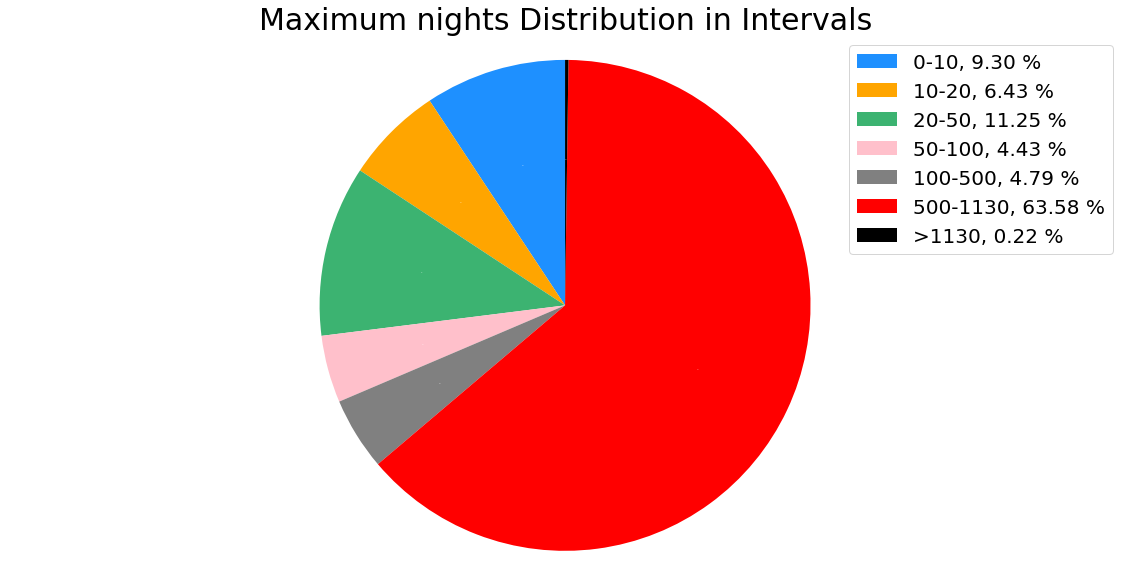

In [9]:
labels = "0-10", "10-20","20-50","50-100","100-500","500-1130",">1130"
sizes = [48420,33487,58525,23044,24925,330879,1158]
colors=['dodgerblue','orange','mediumseagreen','pink','grey','red', 'black']
sum_size = sum(sizes)
perce = []
for i in range(7):
    perce.append((sizes[i]/sum_size)*100)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes,labels=labels, autopct='%1.0f%%',
        colors=colors, startangle=90,
        textprops={'fontsize': 0, 'color': 'w'})

ax1.axis('equal')
plt.legend(loc = 'best', prop={'size': 20}, labels=['%s, %0.2f %%' % (l, s) for l, s in zip(labels, perce)])
plt.title('Maximum nights Distribution in Intervals',fontsize=30)

plt.show()

### Review Scores Value

In [10]:
rating['Review Scores Value'].describe()

count    407388.000000
mean          8.926304
std           2.101985
min           0.000000
25%           9.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: Review Scores Value, dtype: float64

In [11]:
review_score_count = pd.value_counts(rating['Review Scores Value']).to_frame()
review_score_count

,Review Scores Value
10.0,198929
9.0,145231
8.0,33889
0.0,17853
7.0,5142
6.0,4275
4.0,894
2.0,671
5.0,457
3.0,47


Text(0.5, 1.0, 'Listing Counts at Different Score')

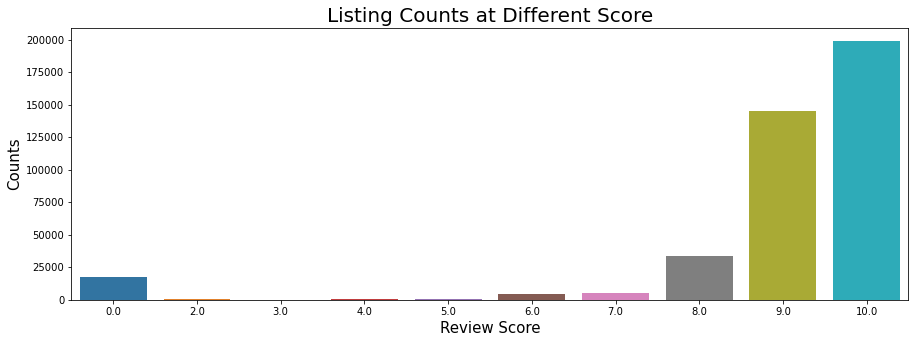

In [12]:
fig, ax5 = plt.subplots(figsize=(15, 5))
sns.barplot(x = review_score_count.index,y = 'Review Scores Value',data = review_score_count,ax=ax5)
plt.xlabel('Review Score',fontsize = 15)
plt.ylabel('Counts',fontsize = 15)
ax5.set_title('Listing Counts at Different Score',fontsize=20)

A majority of Listings have full score 10.

### Number of Reviews

In [13]:
review_count = pd.value_counts(rating['Number of reviews']).to_frame()
review_count

,Number of reviews
0.0,123409
1.0,52394
2.0,35690
3.0,26473
4.0,21168
...,...
457.0,1
364.0,1
461.0,1
424.0,1


In [14]:
bins=np.array([0, 5, 10, 20, 50, 100,800])
review_bins = pd.cut(rating['Number of reviews'],bins)
review_bins_count = pd.value_counts(review_bins).to_frame()
review_bins_count

,Number of reviews
"(0, 5]",153802
"(20, 50]",69281
"(10, 20]",62367
"(5, 10]",59993
"(50, 100]",33808
"(100, 800]",17778


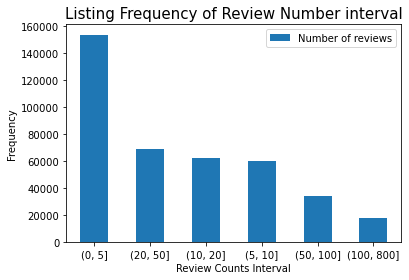

In [15]:
ax = review_bins_count.plot.bar(y='Number of reviews', rot=0)
ax.set_ylabel("Frequency")
ax.set_xlabel("Review Counts Interval")
plt.title('Listing Frequency of Review Number interval',fontsize=15)

plt.show()

## Review

In [16]:
reviews['date'].describe().to_frame()

,date
count,8348173
unique,2988
top,2017-01-01
freq,25765


In [17]:
# TOP 10
date_counts = reviews['date'].value_counts().to_frame()
date_count_top10 = date_counts[:10].sort_index()
date_count_top10

,date
2015-09-21,21938
2016-09-25,20705
2016-10-09,20806
2016-10-16,20881
2016-10-23,21550
2016-11-13,22956
2016-11-27,20917
2017-01-01,25765
2017-01-02,25024
2017-03-19,20959


Text(0.5, 1.0, 'Number of Orders in each day-Top10')

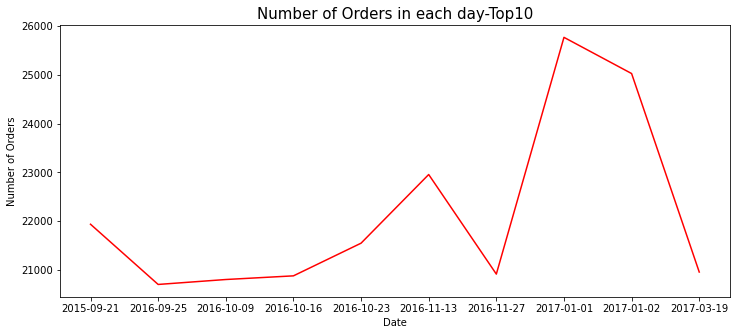

In [18]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(date_count_top10.index,date_count_top10.values,c='r')
ax.set_ylabel("Number of Orders")
ax.set_xlabel("Date")
plt.title('Number of Orders in each day-Top10',fontsize=15)